# Data Preparation

In [1]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
#features = pd.read_csv('temps.csv')
features = pd.read_csv('C:/Users/ashishranjan/Documents/cv_Data.csv')
features.head(5)
features = features.drop('EmployeeNumber',axis=1)

In [429]:
Y=features['Attrition']

In [430]:
Y.value_counts()

2    1233
1     237
Name: Attrition, dtype: int64

In [431]:
features=features.drop('Attrition',axis=1)

In [432]:
features.dtypes

Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

In [433]:
print('The shape of our features is:', features.shape)

The shape of our features is: (1470, 32)


## One-Hot Encoding

One hot encoding takes this:

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |

and converts it into:

| Mon | Tue | Wed | Thu | Fri |
|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   | 0   |
| 0   | 0   | 1   | 0   | 0   |
| 0   | 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 0   | 1   |

In [434]:
df = pd.DataFrame([(1,'wood'),(2,'metal'),(1,'wood'),(2,'wood')],
                         columns=['C1','C2'])

In [435]:
df['C1']=(df['C1'].astype(str))

In [436]:
df.C1

0    1
1    2
2    1
3    2
Name: C1, dtype: object

In [437]:
features.iloc[:, [1,3,5,6,8,11,12,13,14,15,19,21,22,24,27]] = features.iloc[:, [1,3,5,6,8,11,12,13,14,15,19,21,22,24,27]].astype(str)

In [438]:
features.Age

0       41
1       49
2       37
3       33
4       27
5       32
6       59
7       30
8       38
9       36
10      35
11      29
12      31
13      34
14      28
15      29
16      32
17      22
18      53
19      38
20      24
21      36
22      34
23      21
24      34
25      53
26      32
27      42
28      44
29      46
        ..
1440    36
1441    56
1442    29
1443    42
1444    56
1445    41
1446    34
1447    36
1448    41
1449    32
1450    35
1451    38
1452    50
1453    36
1454    45
1455    40
1456    35
1457    40
1458    35
1459    29
1460    29
1461    50
1462    39
1463    31
1464    26
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [439]:
df.dtypes

C1    object
C2    object
dtype: object

In [440]:
pd.get_dummies(df)

,C1_1,C1_2,C2_metal,C2_wood
0,1,0,0,1
1,0,1,1,0
2,1,0,0,1
3,0,1,0,1


In [441]:
features = pd.get_dummies(features)
features.shape

(1470, 79)

In [442]:
features.dtypes

Age                           int64
DailyRate                     int64
DistanceFromHome              int64
EmployeeCount                 int64
Gender                        int64
HourlyRate                    int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
PercentSalaryHike             int64
StandardHours                 int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurr7                int64
BusinessTravel_1              uint8
BusinessTravel_2              uint8
BusinessTravel_3              uint8
Department_1                  uint8
Department_2                  uint8
Department_3                  uint8
Education_1                   uint8
Education_2                   uint8
Education_3                   uint8
Education_4                   uint8
Education_5                 

In [443]:
features.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,0.600000,65.891156,6502.931293,14313.103401,2.693197,15.209524,...,0.312245,0.293878,0.429252,0.405442,0.107483,0.057823,0.054422,0.234014,0.607483,0.104082
std,9.135373,403.509100,8.106864,0.0,0.490065,20.329428,4707.956783,7117.786044,2.498009,3.659938,...,0.463567,0.455692,0.495138,0.491144,0.309832,0.233488,0.226925,0.423525,0.488477,0.305470
min,18.000000,102.000000,1.000000,1.0,0.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,0.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,1.0,1.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,1.0,1.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,1499.000000,29.000000,1.0,1.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [444]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#onehotencoder = OneHotEncoder(categorical_features = [0])
#X = onehotencoder.fit_transform(X).toarray()

In [445]:
onehotencoder =OneHotEncoder(categorical_features =[1,3,5,6,8,11,12,13,14,15,19,21,22,24,27])
X = onehotencoder.fit_transform(features)

In [58]:
X

<1470x79 sparse matrix of type '<class 'numpy.float64'>'
	with 45058 stored elements in COOrdinate format>

In [305]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.shape

(1470, 79)

In [306]:
print('Shape of features after one-hot encoding:', features.shape)

Shape of features after one-hot encoding: (1470, 79)


## Features and Labels

In [446]:
features.columns
features.shape

(1470, 79)

In [447]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = Y.values

# Remove the labels from the features
# axis 1 refers to the columns
#features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = X.toarray()

In [448]:
feature_list
#labels

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'Gender',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurr7',
 'BusinessTravel_1',
 'BusinessTravel_2',
 'BusinessTravel_3',
 'Department_1',
 'Department_2',
 'Department_3',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'EducationField_1',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EducationField_6',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'EnvironmentSatisfaction_4',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobInvolvement_4',
 'JobLevel_1',
 'JobLevel_2',
 'JobLevel_3',
 'JobLevel_4',
 'JobLevel_5',
 'JobRole_1',
 'JobRole_2',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_

In [449]:
features = features.astype('float32')

## Training and Testing Sets

In [450]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [451]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1102, 2510)
Training Labels Shape: (1102,)
Testing Features Shape: (368, 2510)
Testing Labels Shape: (368,)


In [452]:
type(train_labels)
train_labels=np.where(train_labels==2,0,1)
test_lables=np.where(test_labels==2,0,1)

In [453]:
train_labels.shape

(1102,)

In [454]:
sum(test_lables==1)
#rain_labels

48

In [455]:
test_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [459]:
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)
y_pred = rf.predict(test_features)

In [457]:
y_pred.shape

(1102,)

In [460]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_lables, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5281250000000001

In [463]:
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(train_features, train_labels)
    train_pred = rf.predict(train_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(test_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_lables, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


In [473]:
test_results
train_results

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [471]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline 
plt.plot(n_estimators, train_results, label=”Train AUC”)
plt.plot(n_estimators, test_results, label=”Test AUC”)

plt.ylabel(‘AUC score’)
plt.xlabel(‘n_estimators’)
plt.show()



SyntaxError: invalid character in identifier (<ipython-input-471-97b25af0e85f>, line 4)

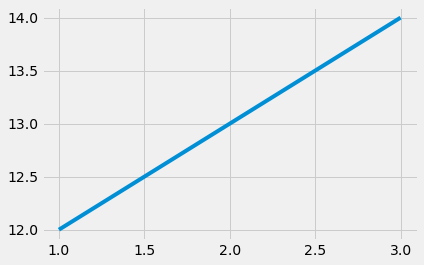

In [482]:
from matplotlib.pyplot import *
p1, = plot([1,2,3],[12,13,14], label="test1")
#p2, = plot([3,2,1], label="test2")

In [483]:
n_estimators
train_results

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

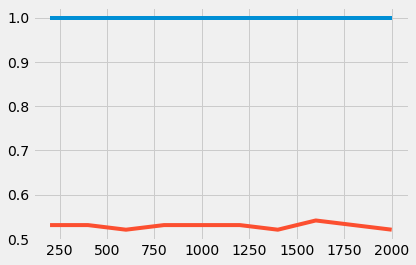

In [487]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plot(n_estimators, train_results)
line2, = plot(n_estimators, test_results)

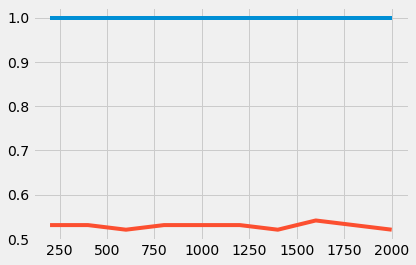

In [489]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results)
line2, = plt.plot(n_estimators, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})


plt.show()

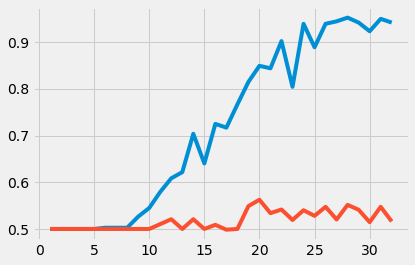

In [494]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(train_features, train_labels)
    train_pred = rf.predict(train_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(test_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_lables, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plot(max_depths, train_results)
line2, = plot(max_depths, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.show()

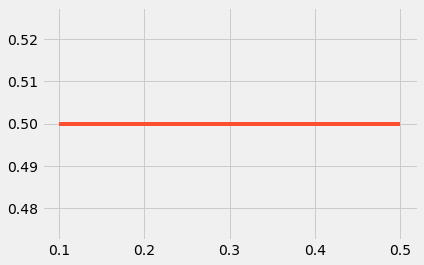

In [496]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(train_features, train_labels)
   train_pred = rf.predict(train_features)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(test_features)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_lables, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results)
line2, = plt.plot(min_samples_leafs, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel(‘AUC score’)
#plt.xlabel(‘min samples leaf’)
plt.show()

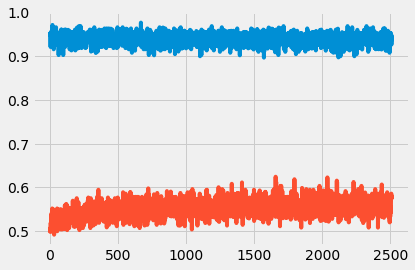

In [500]:
max_features = list(range(1,train_features.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(train_features, train_labels)
    train_pred = rf.predict(train_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(test_features)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_lables, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results)
line2, = plt.plot(max_features, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.show()

## Establish Baseline

In [127]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

ValueError: 'average' is not in list

## Training the Forest

In [361]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [362]:
?RandomForestClassifier

We can create models with different hyperparameters to try and boost performance. The only way to find the best ones
are to try a few and evaluate them! 

In [363]:
rf_new = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [374]:
test_lables.shape
predictions.shape

(368,)

## Make Predictions on Test Data

In [381]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

sum((predictions==1))
sum((test_labels==1))


48

In [318]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 56.52 %.


## Visualizing a Single Decision Tree

In [134]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot' rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

SyntaxError: invalid syntax (<ipython-input-134-0f1c990c1588>, line 9)

![Decision Tree](tree.png)

In [135]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 14


Smaller tree for visualization.

In [383]:
# Limit depth of tree to 2 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

#graph.write_png('small_tree.png')

In [384]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_small.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [385]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [388]:
?RandomizedSearchCV

In [389]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


In [390]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [391]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [392]:
predictions1 = model.predict(test_features)

NameError: name 'model' is not defined

In [325]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [401]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
predictions = base_model.predict(test_features)
#base_accuracy = evaluate(base_model, test_features, test_labels)

In [402]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [398]:
sum(predictions==1)
#sum(test_lables==1)

368

In [400]:

best_random  = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, test_features, test_labels)

In [328]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [403]:


from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [404]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.3min finished


In [189]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [191]:

grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 125}

In [405]:
best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)
best_grid.predict(test_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [407]:
test_features

array([[1., 0., 0., ..., 4., 1., 3.],
       [1., 0., 0., ..., 2., 1., 3.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 8., 4., 7.],
       [1., 0., 0., ..., 0., 1., 2.],
       [0., 0., 1., ..., 7., 1., 7.]], dtype=float32)

In [186]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -1.05%.


In [187]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(train_features, train_labels);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   11.9s finished


In [192]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 125}

In [175]:

best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, test_features, test_labels)

Model Performance
Average Error: 0.2228 degrees.
Accuracy = 83.89%.


In [178]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.96%.


In [193]:

final_model  = grid_search_final.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, test_features, test_labels)

Final Model Parameters:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 110,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 125,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 0.2228 degrees.
Accuracy = 83.89%.


In [194]:
# Time used for evaluating model run times
import time

In [196]:

# Evaluate run time and prediction accuracy
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [197]:
random_results = evaluate_model(best_random, train_features, train_labels, test_features, test_labels)
#In [41]:
random_results['model'] = 'best_random'
#In [42]:
random_results

{'accuracy': 84.7768795289855,
 'error': 0.20461490683229824,
 'model': 'best_random',
 'n_features': 79,
 'n_trees': 200,
 'time': 1.922084665298462}

In [199]:

first_grid_results  = evaluate_model(best_grid, train_features, train_labels, test_features, test_labels)
first_grid_results['model'] = 'first_grid'
#In [44]:
first_grid_results

{'accuracy': 83.81570550275575,
 'error': 0.22433981491710814,
 'model': 'first_grid',
 'n_features': 79,
 'n_trees': 200,
 'time': 0.23090052604675293}

In [200]:
final_model_results = evaluate_model(best_grid_final, train_features, train_labels, test_features, test_labels)
final_model_results['model'] = 'second_grid'
#In [46]:
final_model_results

{'accuracy': 83.88671844885063,
 'error': 0.22275215391318867,
 'model': 'second_grid',
 'n_features': 79,
 'n_trees': 125,
 'time': 0.15109364986419677}

In [287]:
confusion_matrix(test_labels, best_grid_final.predict(test_features))
#print(classification_report(test_labels,grid_pred ))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [205]:
import xgboost

In [246]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [247]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [252]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [262]:
type(train_labels)
train_labels=np.where(train_labels==2,0,1)
test_lables=np.where(test_label==2,0,1)

In [263]:
train_labels

array([0, 0, 0, ..., 1, 0, 0])

In [261]:
train_labels.shape

(1102,)

In [253]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [254]:
features.dtypes
#train_labels.shape

Age                           float32
DailyRate                     float32
DistanceFromHome              float32
EmployeeCount                 float32
Gender                        float32
HourlyRate                    float32
MonthlyIncome                 float32
MonthlyRate                   float32
NumCompaniesWorked            float32
PercentSalaryHike             float32
StandardHours                 float32
TotalWorkingYears             float32
TrainingTimesLastYear         float32
YearsAtCompany                float32
YearsInCurrentRole            float32
YearsSinceLastPromotion       float32
YearsWithCurr7                float32
BusinessTravel_1              float32
BusinessTravel_2              float32
BusinessTravel_3              float32
Department_1                  float32
Department_2                  float32
Department_3                  float32
Education_1                   float32
Education_2                   float32
Education_3                   float32
Education_4 

In [264]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_features, train_labels)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   16.2s finished



 Time taken: 0 hours 0 minutes and 18.83 seconds.


In [265]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([1.09216015, 2.2463491 , 2.02067208, 1.56050102, 2.04766663]), 'std_fit_time': array([0.09446162, 0.04074824, 0.04579142, 0.01720427, 0.05860142]), 'mean_score_time': array([0.00516764, 0.01383313, 0.01233315, 0.00683276, 0.00900102]), 'std_score_time': array([0.00023541, 0.00094263, 0.00085024, 0.00047126, 0.00147021]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [266]:
y_test = random_search.predict_proba(test_features)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

In [267]:
y_test

array([[0.953607  , 0.04639298],
       [0.99039555, 0.00960447],
       [0.66042674, 0.3395733 ],
       [0.9829619 , 0.0170381 ],
       [0.9717719 , 0.02822811],
       [0.54113305, 0.45886698],
       [0.9400626 , 0.05993744],
       [0.94975185, 0.05024812],
       [0.89175826, 0.10824176],
       [0.96584296, 0.03415704],
       [0.7034514 , 0.29654858],
       [0.84280396, 0.15719603],
       [0.9771714 , 0.02282859],
       [0.92774576, 0.07225422],
       [0.9716295 , 0.02837052],
       [0.9411914 , 0.05880863],
       [0.7349113 , 0.26508868],
       [0.96336305, 0.03663694],
       [0.9547245 , 0.04527553],
       [0.9671579 , 0.03284208],
       [0.8239794 , 0.17602059],
       [0.977975  , 0.02202498],
       [0.9841897 , 0.0158103 ],
       [0.9001239 , 0.09987608],
       [0.96571076, 0.03428922],
       [0.9110238 , 0.08897621],
       [0.83494985, 0.16505018],
       [0.9859417 , 0.01405827],
       [0.96230996, 0.03769006],
       [0.9827963 , 0.01720366],
       [0.

In [269]:
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(train_features, train_labels), verbose=3 )
grid.fit(train_features, train_labels)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)
# results = pd.DataFrame(grid.cv_results_)
# results.to_csv('xgb-grid-search-results-01.csv', index=False)

#y_test = grid.best_estimator_.predict_proba(test)
# results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
# results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   18.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   58.5s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed: 11.8min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001BF27902FC0>,
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=3)

In [271]:
y_test = grid.best_estimator_.predict_proba(test_features)

In [272]:
y_test 

array([[0.9195561 , 0.08044393],
       [0.98100066, 0.01899932],
       [0.5899068 , 0.41009316],
       [0.9676505 , 0.03234953],
       [0.94894135, 0.05105864],
       [0.61935127, 0.38064876],
       [0.90877885, 0.09122117],
       [0.9225794 , 0.07742056],
       [0.8755983 , 0.1244017 ],
       [0.94959104, 0.05040898],
       [0.64188814, 0.3581119 ],
       [0.8042077 , 0.19579235],
       [0.949894  , 0.05010596],
       [0.8961468 , 0.1038532 ],
       [0.9399999 , 0.06000012],
       [0.91513425, 0.08486576],
       [0.68942046, 0.31057957],
       [0.9409292 , 0.05907084],
       [0.9469614 , 0.0530386 ],
       [0.9538884 , 0.04611159],
       [0.81828845, 0.18171154],
       [0.96828616, 0.03171381],
       [0.96620107, 0.03379895],
       [0.87290734, 0.12709266],
       [0.9489819 , 0.0510181 ],
       [0.8954469 , 0.10455312],
       [0.8193679 , 0.18063213],
       [0.9768645 , 0.0231355 ],
       [0.94848734, 0.05151265],
       [0.97535455, 0.02464542],
       [0.

In [274]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [282]:
rand_pred=random_search.predict(test_features)

In [277]:
accuracy_score(train_labels, random_search.predict(train_features))
accuracy_score(test_labels, random_search.predict(test_features))

0.035326086956521736

In [278]:
accuracy_score(train_labels, grid.best_estimator_.predict(train_features))
accuracy_score(test_labels, grid.best_estimator_.predict(test_features))

0.029891304347826088

In [283]:
grid_pred=grid.best_estimator_.predict(test_features)

In [285]:
confusion_matrix(test_labels, random_search.predict(test_features))
from sklearn.metrics import classification_report
print(classification_report(test_labels,rand_pred ))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.76      0.27      0.40        48
          2       0.00      0.00      0.00       320

avg / total       0.10      0.04      0.05       368



In [286]:
confusion_matrix(test_labels, grid.best_estimator_.predict(test_features))
print(classification_report(test_labels,grid_pred ))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.61      0.23      0.33        48
          2       0.00      0.00      0.00       320

avg / total       0.08      0.03      0.04       368



In [201]:
comparison = {'model': [baseline_results['model'], one_year_results['model']],
              'accuracy': [round(baseline_results['accuracy'], 3), round(one_year_results['accuracy'], 3)],
              'error': [round(baseline_results['error'], 3), round(one_year_results['error'], 3)],
              'n_features': [baseline_results['n_features'], one_year_results['n_features']],
              'n_trees': [baseline_results['n_trees'], int(one_year_results['n_trees'])],
              'time': [round(baseline_results['time'], 4), round(one_year_results['time'], 4)]}
                        
for model in [random_results, first_grid_results, final_model_results]:
    comparison['accuracy'].append(round(model['accuracy'], 3))
    comparison['error'].append(round(model['error'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))

NameError: name 'baseline_results' is not defined

![Small Decision Tree](small_tree.PNG)

### Annotated Version of Tree

![Annotated Decision Tree](small_tree_annotated.PNG)

## Variable Importances

In [139]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RelationshipSatisfaction_2 Importance: 0.12
Variable: OverTime_1           Importance: 0.06
Variable: MaritalStatus_3      Importance: 0.05
Variable: StockOptionLevel_2   Importance: 0.05
Variable: JobLevel_5           Importance: 0.04
Variable: JobRole_1            Importance: 0.04
Variable: OverTime_2           Importance: 0.04
Variable: RelationshipSatisfaction_1 Importance: 0.04
Variable: RelationshipSatisfaction_3 Importance: 0.04
Variable: RelationshipSatisfaction_4 Importance: 0.04
Variable: WorkLifeBalance_1    Importance: 0.04
Variable: StockOptionLevel_0   Importance: 0.03
Variable: StockOptionLevel_3   Importance: 0.03
Variable: WorkLifeBalance_3    Importance: 0.03
Variable: JobLevel_2           Importance: 0.02
Variable: JobRole_8            Importance: 0.02
Variable: WorkLifeBalance_2    Importance: 0.02
Variable: WorkLifeBalance_4    Importance: 0.02
Variable: DailyRate            Importance: 0.01
Variable: EmployeeCount        Importance: 0.01
Variable: YearsI

### Two Most Important Features

In [140]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

ValueError: 'temp_1' is not in list

## Visualizations

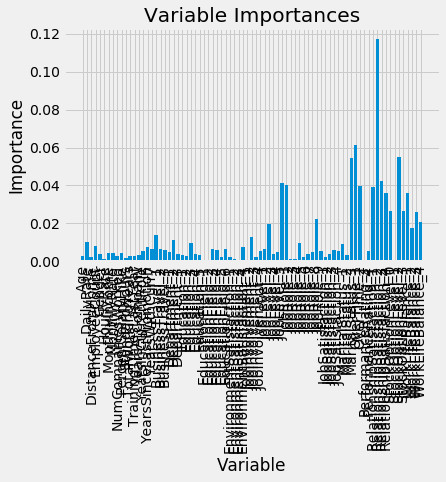

In [141]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [142]:
import datetime

# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions}) 

ValueError: 'month' is not in list

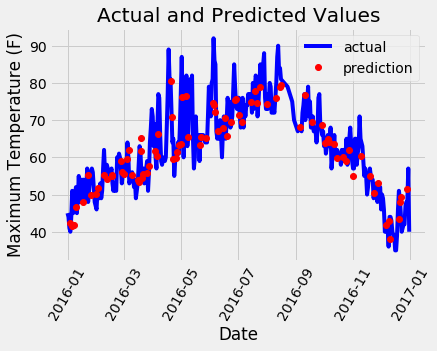

In [20]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


In [143]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

ValueError: 'temp_1' is not in list